In [31]:
from monty.serialization import loadfn, dumpfn
import os
import pandas as pd
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatter

In [2]:
data_path = "../data/oxi-mp_property_dataset.json.gz"

In [3]:
df = loadfn(data_path)
df.head()

,formula_pretty,material_id,formation_energy_per_atom,band_gap,is_metal,is_magnetic,oxi_composition,composition
0,LiTiS2,mp-1001784,-1.657149,0.0000,True,True,"{'Li+': 1.0, 'Ti3+': 1.0, 'S2-': 2.0}","{'Li': 1.0, 'Ti': 1.0, 'S': 2.0}"
1,HfN,mp-1001916,-1.655843,0.0000,True,False,"{'Hf3+': 1.0, 'N3-': 1.0}","{'Hf': 1.0, 'N': 1.0}"
2,FeBi2Se2Cl3O7,mp-1192577,-1.486826,1.3914,False,True,"{'Fe3+': 1.0, 'Bi3+': 2.0, 'Se4+': 2.0, 'Cl-':...","{'Fe': 1.0, 'Bi': 2.0, 'Se': 2.0, 'Cl': 3.0, '..."
3,Cu(SbO2)2,mp-1193545,-1.479742,0.4813,False,True,"{'Cu2+': 1.0, 'Sb3+': 2.0, 'O2-': 4.0}","{'Cu': 1.0, 'Sb': 2.0, 'O': 4.0}"
4,AlIn(SO4)3,mp-2713949,-2.109730,3.9637,False,False,"{'Al3+': 1.0, 'In3+': 1.0, 'S6+': 3.0, 'O2-': ...","{'Al': 1.0, 'In': 1.0, 'S': 3.0, 'O': 12.0}"


In [4]:
def num_els(comp_dict):
    return len(comp_dict.keys())

df['num_els']=df.composition.apply(num_els)
df['num_sp']=df.oxi_composition.apply(num_els)
df.head()

,formula_pretty,material_id,formation_energy_per_atom,band_gap,is_metal,is_magnetic,oxi_composition,composition,num_els,num_sp
0,LiTiS2,mp-1001784,-1.657149,0.0000,True,True,"{'Li+': 1.0, 'Ti3+': 1.0, 'S2-': 2.0}","{'Li': 1.0, 'Ti': 1.0, 'S': 2.0}",3,3
1,HfN,mp-1001916,-1.655843,0.0000,True,False,"{'Hf3+': 1.0, 'N3-': 1.0}","{'Hf': 1.0, 'N': 1.0}",2,2
2,FeBi2Se2Cl3O7,mp-1192577,-1.486826,1.3914,False,True,"{'Fe3+': 1.0, 'Bi3+': 2.0, 'Se4+': 2.0, 'Cl-':...","{'Fe': 1.0, 'Bi': 2.0, 'Se': 2.0, 'Cl': 3.0, '...",5,5
3,Cu(SbO2)2,mp-1193545,-1.479742,0.4813,False,True,"{'Cu2+': 1.0, 'Sb3+': 2.0, 'O2-': 4.0}","{'Cu': 1.0, 'Sb': 2.0, 'O': 4.0}",3,3
4,AlIn(SO4)3,mp-2713949,-2.109730,3.9637,False,False,"{'Al3+': 1.0, 'In3+': 1.0, 'S6+': 3.0, 'O2-': ...","{'Al': 1.0, 'In': 1.0, 'S': 3.0, 'O': 12.0}",4,4


In [30]:
df.query("num_els==4 & num_sp==6")

,formula_pretty,material_id,formation_energy_per_atom,band_gap,is_metal,is_magnetic,oxi_composition,composition,num_els,num_sp
197,MgTi2(Bi2O5)2,mp-2229590,-2.268458,1.1012,False,False,"{'Mg2+': 1.0, 'Ti3+': 1.0, 'Ti4+': 1.0, 'Bi3+'...","{'Mg': 1.0, 'Ti': 2.0, 'Bi': 4.0, 'O': 10.0}",4,6
204,Li4MnCo2O7,mp-1174743,-1.822557,0.0000,True,True,"{'Li+': 4.0, 'Mn3+': 0.5, 'Mn4+': 0.5, 'Co4+':...","{'Li': 4.0, 'Mn': 1.0, 'Co': 2.0, 'O': 7.0}",4,6
252,CoSb(PO4)2,mp-1666719,-2.236161,1.5338,False,True,"{'Co3+': 0.5, 'Co2+': 0.5, 'Sb4+': 0.5, 'Sb3+'...","{'Co': 1.0, 'Sb': 1.0, 'P': 2.0, 'O': 8.0}",4,6
279,MoWSeS3,mp-1030131,-1.096176,0.5956,False,False,"{'Mo3+': 0.5, 'Mo4+': 0.5, 'W4+': 0.5, 'W5+': ...","{'Mo': 1.0, 'W': 1.0, 'Se': 1.0, 'S': 3.0}",4,6
281,Li9Mn2Co5O16,mp-1176099,-1.805494,0.0246,False,True,"{'Li+': 9.0, 'Mn4+': 1.0, 'Mn3+': 1.0, 'Co3+':...","{'Li': 9.0, 'Mn': 2.0, 'Co': 5.0, 'O': 16.0}",4,6
...,...,...,...,...,...,...,...,...,...,...
109632,Li9Mn2Co5O16,mp-1176212,-1.812882,0.3269,False,True,"{'Li+': 9.0, 'Mn4+': 1.0, 'Mn3+': 1.0, 'Co3+':...","{'Li': 9.0, 'Mn': 2.0, 'Co': 5.0, 'O': 16.0}",4,6
109672,Mo3C8S13N2,mp-1193014,0.478396,0.0000,True,True,"{'Mo4+': 2.0, 'Mo5+': 1.0, 'C2+': 8.0, 'S2-': ...","{'Mo': 3.0, 'C': 8.0, 'S': 13.0, 'N': 2.0}",4,6
109776,Nb12TlTe15As,mp-1220809,-0.672695,0.0000,True,False,"{'Nb3+': 6.0, 'Nb2+': 6.0, 'Tl+': 1.0, 'Te2-':...","{'Nb': 12.0, 'Tl': 1.0, 'Te': 15.0, 'As': 1.0}",4,6
110018,Li10Ge(PS6)2,mp-696138,-1.200428,2.3653,False,False,"{'Li+': 10.0, 'Ge4+': 1.0, 'P5+': 1.5, 'P4+': ...","{'Li': 10.0, 'Ge': 1.0, 'P': 2.0, 'S': 12.0}",4,6


In [ ]:
df['oxi_composition'][110018]

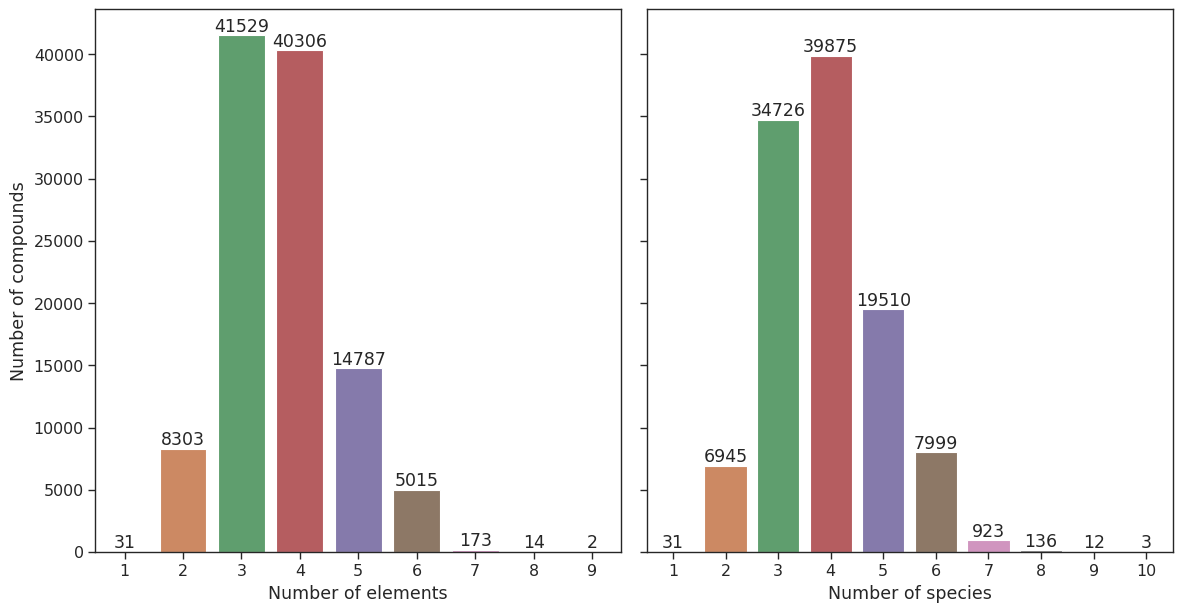

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context="paper",style="ticks",font_scale=1.3,)
fig, axes = plt.subplots(1,2,figsize=(12,.7*9),sharey=True)

for ax, dat in zip(axes.flatten(),["num_els","num_sp"]):
    sns.countplot(df,x=dat,ax=ax)
    ax.bar_label(ax.containers[0])
    
#sns.scatterplot(df,x="num_els",y="num_sp",alpha=0.4,s=100,ax=axes[2])
    
axes[0].set_xlabel("Number of elements")
axes[1].set_xlabel("Number of species")
axes[0].set_ylabel("Number of compounds")
axes[1].set_ylabel("")
plt.tight_layout()
plt.savefig("mp_dataset_distribution.pdf",dpi=300,bbox_inches="tight",transparent=True)
plt.show()

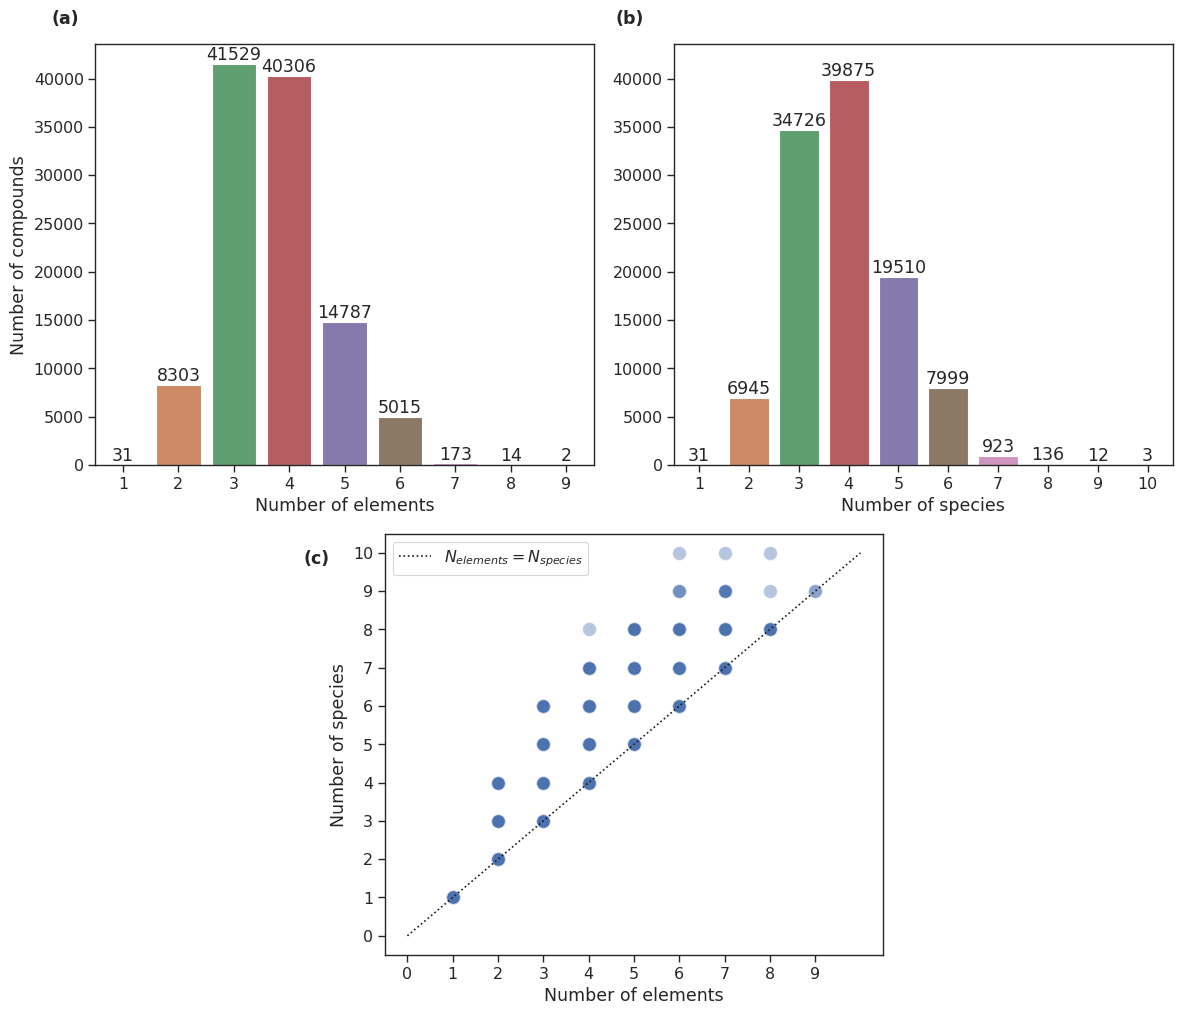

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a layout with subplot2grid
fig = plt.figure(figsize=(12, 10))

# Define the grid for subplots
ax1 = plt.subplot2grid((2, 4), (0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 4), (0, 2), colspan=2,sharey=ax1)
ax3 = plt.subplot2grid((2, 4), (1, 1), colspan=2)
axes=[ax1,ax2,ax3]
# Use Seaborn to enhance the plots
sns.scatterplot(df,x="num_els",y="num_sp",alpha=0.4,s=100,ax=ax3,rasterized=True)
for ax, dat in zip([ax1,ax2],["num_els","num_sp"]):
    sns.countplot(df,x=dat,ax=ax)
    ax.bar_label(ax.containers[0])

# Add labels, legends, etc. as needed
axes[0].set_xlabel("Number of elements")
axes[1].set_xlabel("Number of species")
axes[0].set_ylabel("Number of compounds")
axes[1].set_ylabel("")

axes[2].set_xlabel("Number of elements")
axes[2].set_ylabel("Number of species")
axes[2].set_yticks(range(0,11))
axes[2].set_xticks(range(0,10))
axes[2].plot(range(0,11),range(0,11),"k:",label="$N_{elements}=N_{species}$",)
axes[2].legend()
fig.text(0.05, 1, '(a)', weight='bold')
fig.text(0.52, 1, '(b)', weight='bold')
fig.text(0.26, .46, '(c)', weight='bold')
# Adjust spacing
#plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
# Show the plot
plt.savefig("MP_skip_training_dataset.pdf",dpi=300,bbox_inches="tight",transparent=True)
plt.show()


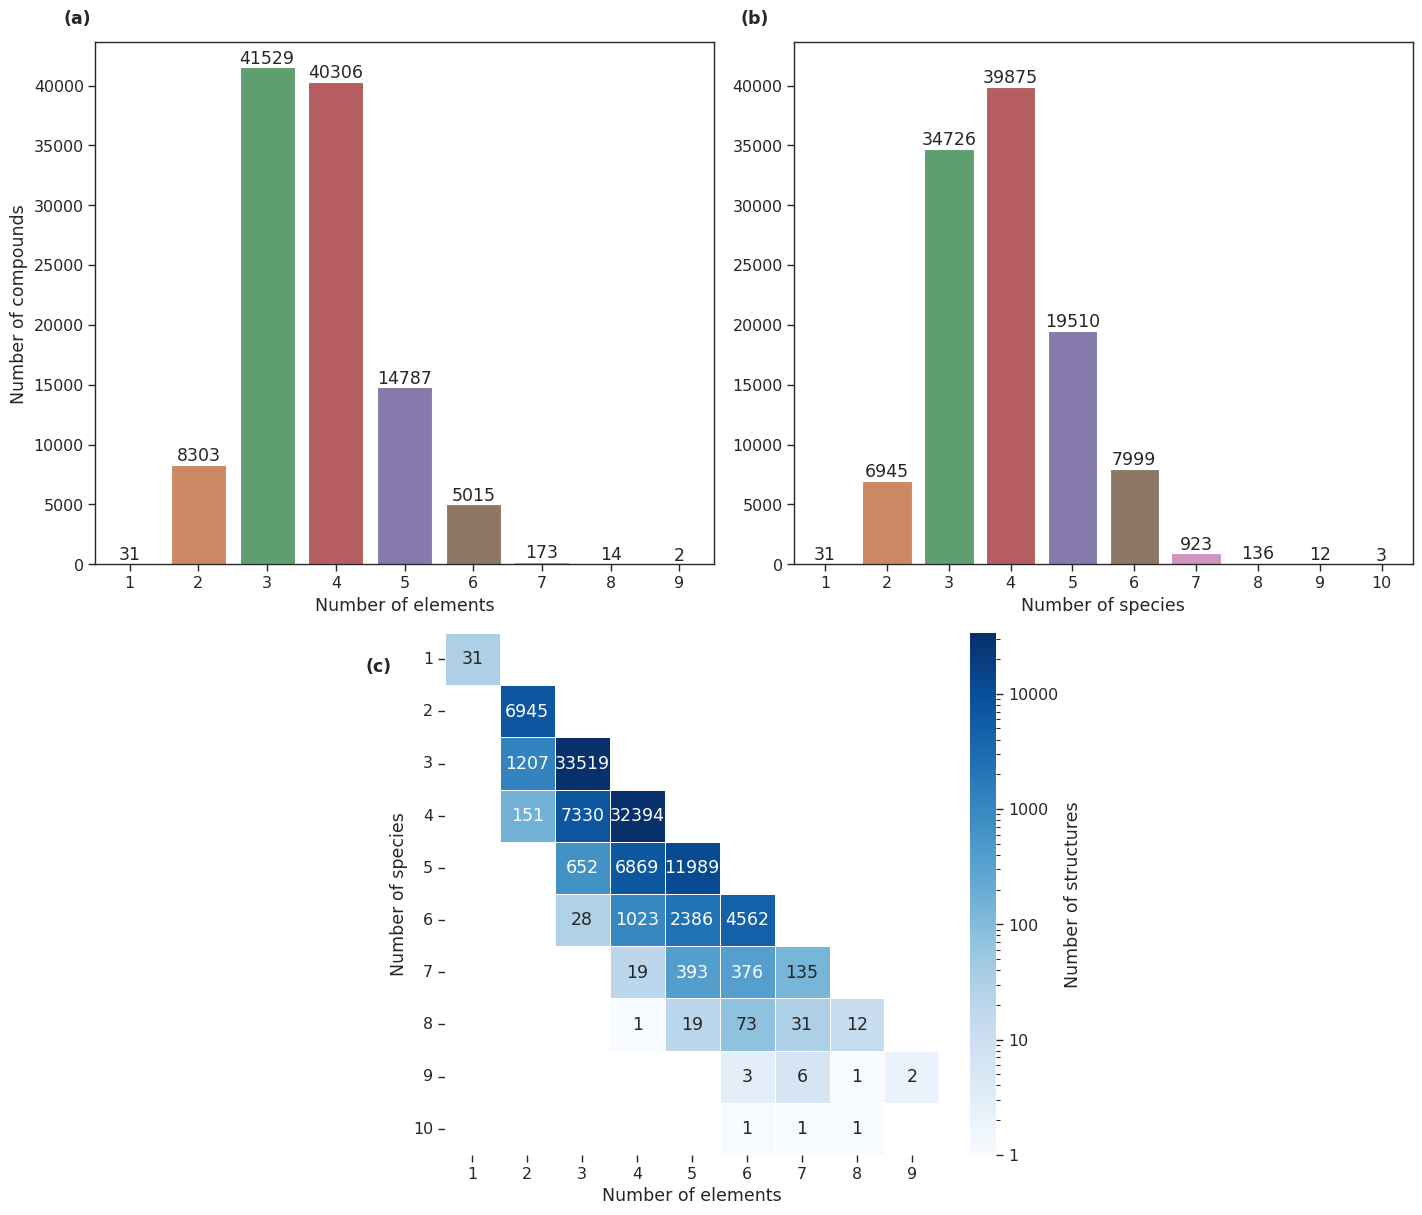

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a layout with subplot2grid
fig = plt.figure(figsize=(1.2*12, 1.2*10))

# Define the grid for subplots
ax1 = plt.subplot2grid((2, 4), (0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 4), (0, 2), colspan=2,sharey=ax1)
ax3 = plt.subplot2grid((2, 4), (1, 1), colspan=2)
axes=[ax1,ax2,ax3]
# Use Seaborn to enhance the plots
for ax, dat in zip([ax1,ax2],["num_els","num_sp"]):
    sns.countplot(df,x=dat,ax=ax)
    ax.bar_label(ax.containers[0])

sns.heatmap(pivot,annot=True,cmap="Blues",fmt=".0f",robust=True,linewidth=.5,cbar_kws={"label":"Number of structures"},norm=LogNorm(),ax=ax3)
cbar = ax3.collections[0].colorbar
cbar.set_ticks([1, 10, 100, 1000,10000])  # Customize ticks based on your data
cbar.set_ticklabels(['1', '10', '100', '1000','10000'])  # Customize labels based on your data


# Add labels, legends, etc. as needed
axes[0].set_xlabel("Number of elements")
axes[1].set_xlabel("Number of species")
axes[0].set_ylabel("Number of compounds")
axes[1].set_ylabel("")

axes[2].set_xlabel("Number of elements")
axes[2].set_ylabel("Number of species")
axes[2].tick_params(axis='y', rotation=0)
fig.text(0.05, 1, '(a)', weight='bold')
fig.text(0.52, 1, '(b)', weight='bold')
fig.text(0.26, .46, '(c)', weight='bold')
# Adjust spacing
#plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
# Show the plot
plt.savefig("MP_skip_training_dataset_alt.pdf",dpi=300,bbox_inches="tight",transparent=True)
plt.show()


In [8]:
pivot = df.groupby(["num_sp","num_els"]).size().unstack().fillna(0)
pivot.head()

num_els,1,2,3,4,5,6,7,8,9
num_sp,,,,,,,,,
1,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,6945.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1207.0,33519.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,151.0,7330.0,32394.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,652.0,6869.0,11989.0,0.0,0.0,0.0,0.0


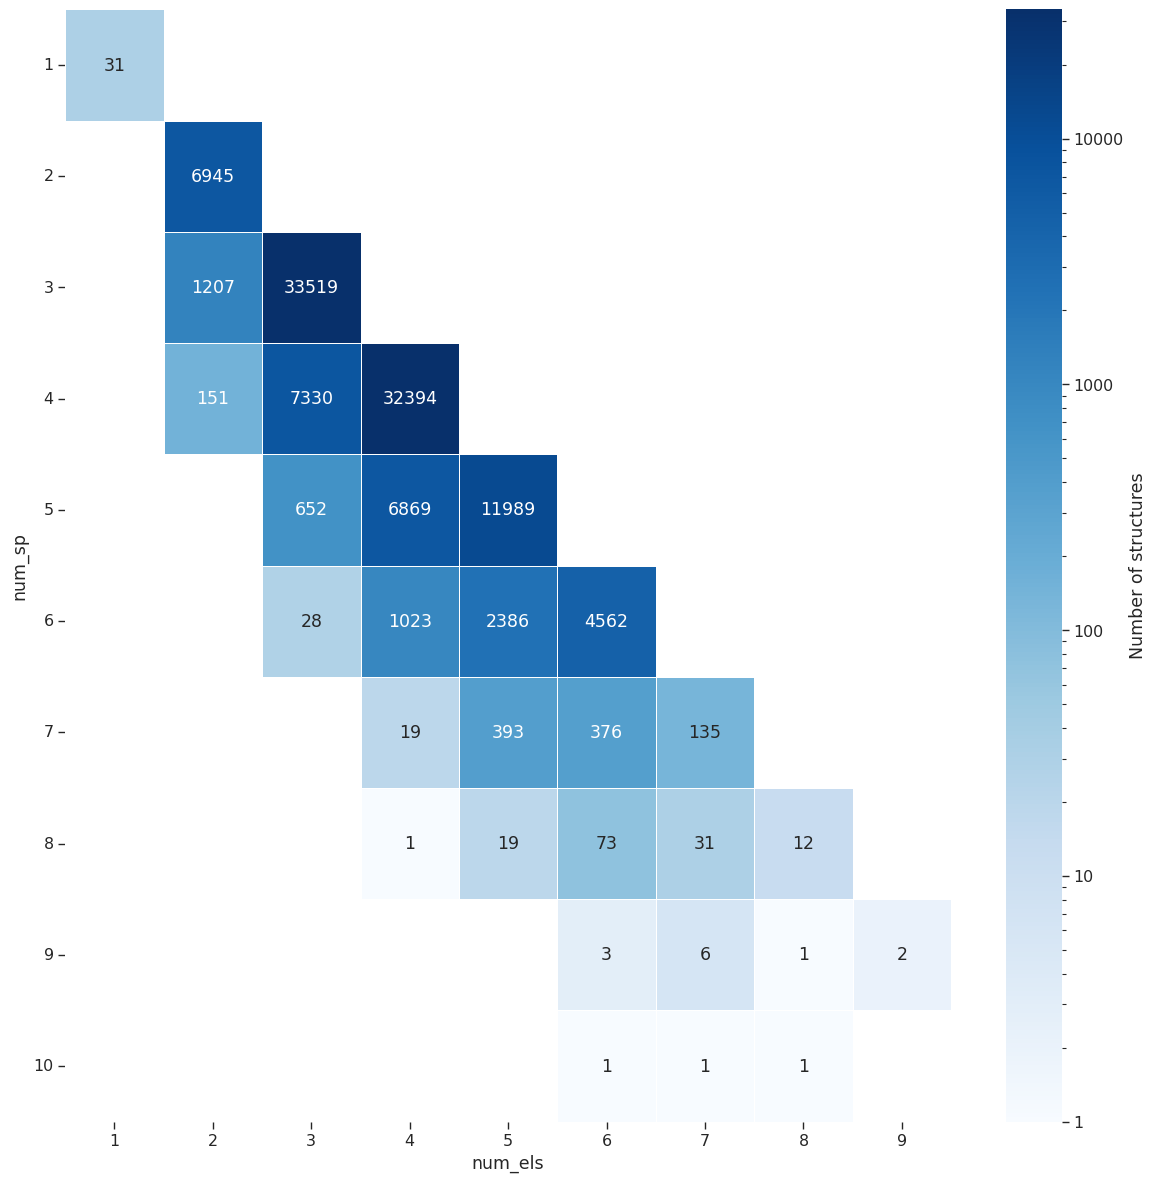

In [18]:
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatter
fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(pivot,annot=True,cmap="Blues",fmt=".0f",robust=True,linewidth=.5,cbar_kws={"label":"Number of structures"},norm=LogNorm(),ax=ax)
cbar = ax.collections[0].colorbar
cbar.set_ticks([1, 10, 100, 1000,10000])  # Customize ticks based on your data
cbar.set_ticklabels(['1', '10', '100', '1000','10000'])  # Customize labels based on your data
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [33]:
print(f"Data set size: {df.shape[0]}")
print(f"Unique formula: {df.formula_pretty.nunique()}")
unique_dicts_count_comp = len(df['composition'].apply(str).unique())

unique_dicts_count_oxi_comp = len(df['oxi_composition'].apply(str).unique())
print(f"Unique elemental compositions: {unique_dicts_count_comp}")

print(f"Unique ionic compositions: {unique_dicts_count_oxi_comp}")

Data set size: 110160
Unique formula: 71470
Unique elemental compositions: 71491
Unique ionic compositions: 74785


In [24]:
# Normalise compositions
from typing import Dict
def _get_fractional_composition(el_dict: str) -> Dict[str, float]:
    elamt = {}
    natoms = 0
    for el, v in el_dict.items():
        elamt[el] = v
        natoms += abs(v)
    return {el: elamt[el] / natoms for el in elamt}

_get_fractional_composition(df['oxi_composition'][0])

{'Li+': 0.25, 'Ti3+': 0.25, 'S2-': 0.5}

In [25]:
len(df['oxi_composition'].apply(_get_fractional_composition).apply(str).unique())

74785

In [26]:
df['oxi_composition'].apply(_get_fractional_composition).apply(str).value_counts()

oxi_composition
{'Li+': 0.28125, 'Mn4+': 0.0625, 'Co3+': 0.15625, 'O2-': 0.5}                                                                                  405
{'Si4+': 0.3333333333333333, 'O2-': 0.6666666666666666}                                                                                        321
{'Ce4+': 0.3333333333333333, 'Se2-': 0.6666666666666666}                                                                                       150
{'Zn2+': 0.5, 'S2-': 0.5}                                                                                                                      146
{'Li+': 0.2916666666666667, 'Mn4+': 0.08333333333333333, 'Co3+': 0.125, 'O2-': 0.5}                                                            145
                                                                                                                                              ... 
{'K+': 0.07692307692307693, 'Sr2+': 0.07692307692307693, 'B3+': 0.07692307692307693, 'P5+': 0.15384615

In [34]:
unique_df = df.sort_values(by=["formula_pretty",'formation_energy_per_atom']).drop_duplicates(subset="formula_pretty",ignore_index=True)
print(f"Data size with only lowest energy polymorphs: {len(unique_df)}")
unique_df.head()

Data size with only lowest energy polymorphs: 71470


,formula_pretty,material_id,formation_energy_per_atom,band_gap,is_metal,is_magnetic,oxi_composition,composition,num_els,num_sp
0,Ac2O3,mp-11107,-3.738432,3.5226,False,False,"{'Ac3+': 2.0, 'O2-': 3.0}","{'Ac': 2.0, 'O': 3.0}",2,2
1,Ac2S3,mp-32800,-2.459936,2.2729,False,False,"{'Ac3+': 2.0, 'S2-': 3.0}","{'Ac': 2.0, 'S': 3.0}",2,2
2,AcAgTe2,mp-867311,-1.035756,0.0794,False,False,"{'Ac3+': 1.0, 'Ag+': 1.0, 'Te2-': 2.0}","{'Ac': 1.0, 'Ag': 1.0, 'Te': 2.0}",3,3
3,AcAlO3,mp-1183115,-3.690783,4.1024,False,False,"{'Ac3+': 1.0, 'Al3+': 1.0, 'O2-': 3.0}","{'Ac': 1.0, 'Al': 1.0, 'O': 3.0}",3,3
4,AcAu3,mp-867838,-0.688905,0.0000,True,False,"{'Ac3+': 1.0, 'Au-': 3.0}","{'Ac': 1.0, 'Au': 3.0}",2,2


In [35]:
unique_df.is_magnetic.sum()

30997

In [37]:
unique_df.band_gap.mean()

1.4872713264306698

In [1]:
unique_df.query("band_gap > 0").plot()

NameError: name 'unique_df' is not defined

In [30]:
"is_metal".replace("_", " ").capitalize()

'Is metal'

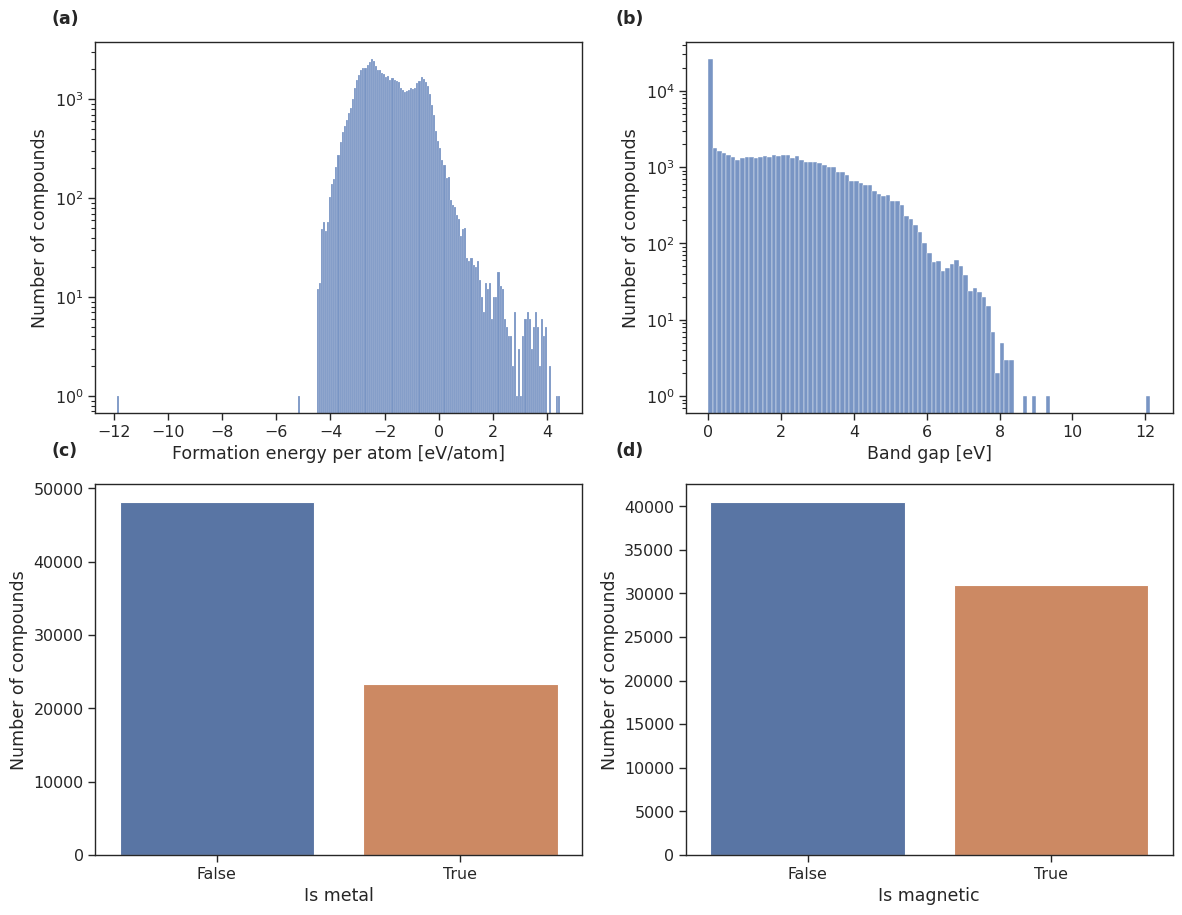

In [111]:
props = ["formation_energy_per_atom","band_gap","is_metal","is_magnetic"]
class_props =["is_metal","is_magnetic"]
units = {"formation_energy_per_atom":"eV/atom","band_gap":"eV"}
fig,axes = plt.subplots(2,2, figsize=(12,9))

for prop, ax in zip(props,axes.flatten()):
    if prop in class_props:
        sns.countplot(unique_df,x=prop,ax=ax)
        ax.set_xlabel(prop.replace("_", " ").capitalize())
    else:    
        sns.histplot(unique_df,x=prop,ax=ax,rasterized=True)
        ax.set_xlabel(prop.replace("_", " ").capitalize()+f" [{units[prop]}]")
        ax.set_yscale('log')
    #ax.set_xlabel(prop.replace("_", " ").capitalize())
    ax.set_ylabel("Number of compounds")

fig.text(0.05, 1, '(a)', weight='bold')
fig.text(0.52, 1, '(b)', weight='bold')
fig.text(0.05, .52, '(c)', weight='bold')
fig.text(0.52, .52, '(d)', weight='bold')

plt.tight_layout()
plt.savefig("Property_dataset.pdf",dpi=300,bbox_inches="tight",transparent=True)
plt.show()

In [21]:
# Export the unique formula dataset
dumpfn(unique_df, fn="../data/oxi-mp_property_dataset_unique_formulas.json.gz")